In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [33]:
df = pd.read_csv('data\proposicoes_2013-2024_final.csv')
df

,nomeProposicao,idProposicao,partidoAutor,DataApresentacao,Ano,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,VirouLei,Influencia,Aliado,Oposição
0,PL 7021/2013,604997,PSD,2013-12-19,2013,0,0,1,0,0,0,0.077973,1,0
1,PL 7020/2013,604994,PRP,2013-12-19,2013,0,0,0,1,0,0,0.024691,0,0
2,PL 7017/2013,604974,PSC,2013-12-18,2013,0,0,0,1,1,0,0.025341,1,0
3,PL 7016/2013,604968,PMDB,2013-12-18,2013,1,0,0,0,0,0,0.148148,1,0
4,PL 7014/2013,604961,PROS,2013-12-18,2013,0,1,0,0,0,0,0.033138,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7956,PL 712/2024,2420454,PP,2024-03-12,2024,0,1,0,0,0,0,0.097466,1,0
7957,PL 590/2024,2419509,REPUBLICANOS,2024-03-06,2024,0,0,1,0,0,0,0.083821,0,0
7958,PL 545/2024,2419197,PT,2024-03-05,2024,1,0,0,1,0,1,0.132554,1,0
7959,PL 147/2024,2417234,SOLIDARIEDADE,2024-02-06,2024,0,0,1,0,0,1,0.011696,1,0


In [34]:
cols = [col for col in df.columns if col != 'VirouLei'] + ['VirouLei']
df = df[cols]
df

,nomeProposicao,idProposicao,partidoAutor,DataApresentacao,Ano,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,Influencia,Aliado,Oposição,VirouLei
0,PL 7021/2013,604997,PSD,2013-12-19,2013,0,0,1,0,0,0.077973,1,0,0
1,PL 7020/2013,604994,PRP,2013-12-19,2013,0,0,0,1,0,0.024691,0,0,0
2,PL 7017/2013,604974,PSC,2013-12-18,2013,0,0,0,1,1,0.025341,1,0,0
3,PL 7016/2013,604968,PMDB,2013-12-18,2013,1,0,0,0,0,0.148148,1,0,0
4,PL 7014/2013,604961,PROS,2013-12-18,2013,0,1,0,0,0,0.033138,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7956,PL 712/2024,2420454,PP,2024-03-12,2024,0,1,0,0,0,0.097466,1,0,0
7957,PL 590/2024,2419509,REPUBLICANOS,2024-03-06,2024,0,0,1,0,0,0.083821,0,0,0
7958,PL 545/2024,2419197,PT,2024-03-05,2024,1,0,0,1,0,0.132554,1,0,1
7959,PL 147/2024,2417234,SOLIDARIEDADE,2024-02-06,2024,0,0,1,0,0,0.011696,1,0,1


In [35]:
virou_lei_counts = df['VirouLei'].value_counts()
print("Total: ", virou_lei_counts)

Total:  VirouLei
0    7193
1     768
Name: count, dtype: int64


Árvore de Decisão com Cost-Sensitive Learning

In [36]:
colunas = df.columns.tolist()
x = df[colunas[5:-1]]
y = df[colunas[-1]]

x

,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,Influencia,Aliado,Oposição
0,0,0,1,0,0,0.077973,1,0
1,0,0,0,1,0,0.024691,0,0
2,0,0,0,1,1,0.025341,1,0
3,1,0,0,0,0,0.148148,1,0
4,0,1,0,0,0,0.033138,1,0
...,...,...,...,...,...,...,...,...
7956,0,1,0,0,0,0.097466,1,0
7957,0,0,1,0,0,0.083821,0,0
7958,1,0,0,1,0,0.132554,1,0
7959,0,0,1,0,0,0.011696,1,0


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#penalização customizada
class_w = {0: 1, 1: 3}

#adicionando um balanceamento automatico
clf = DecisionTreeClassifier(class_weight=class_w)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


- Visualização

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2145
           1       0.17      0.14      0.15       244

    accuracy                           0.84      2389
   macro avg       0.54      0.53      0.53      2389
weighted avg       0.83      0.84      0.83      2389



In [39]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy*100:.2f}%')

Acurácia do modelo: 84.01%


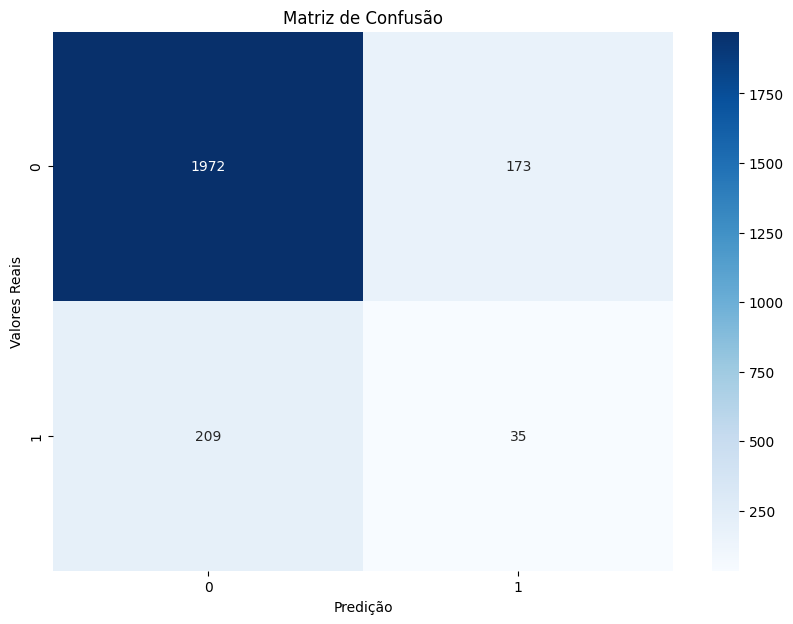

In [40]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

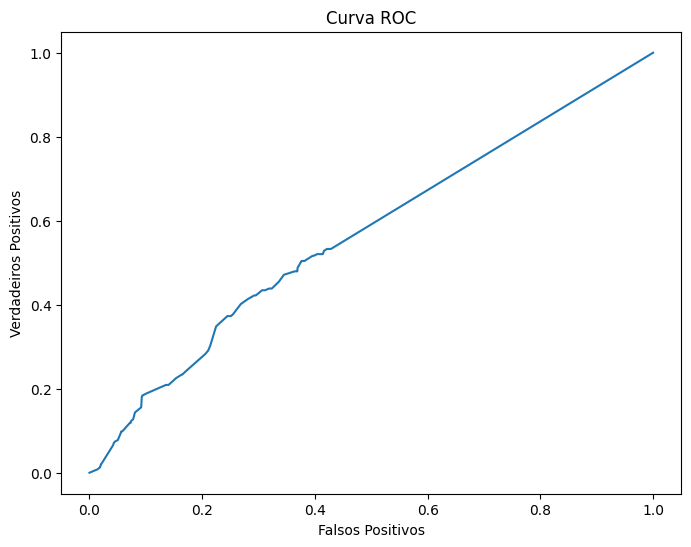

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = clf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)


plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'curva ROC (AUC = {auc:.2f})')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()


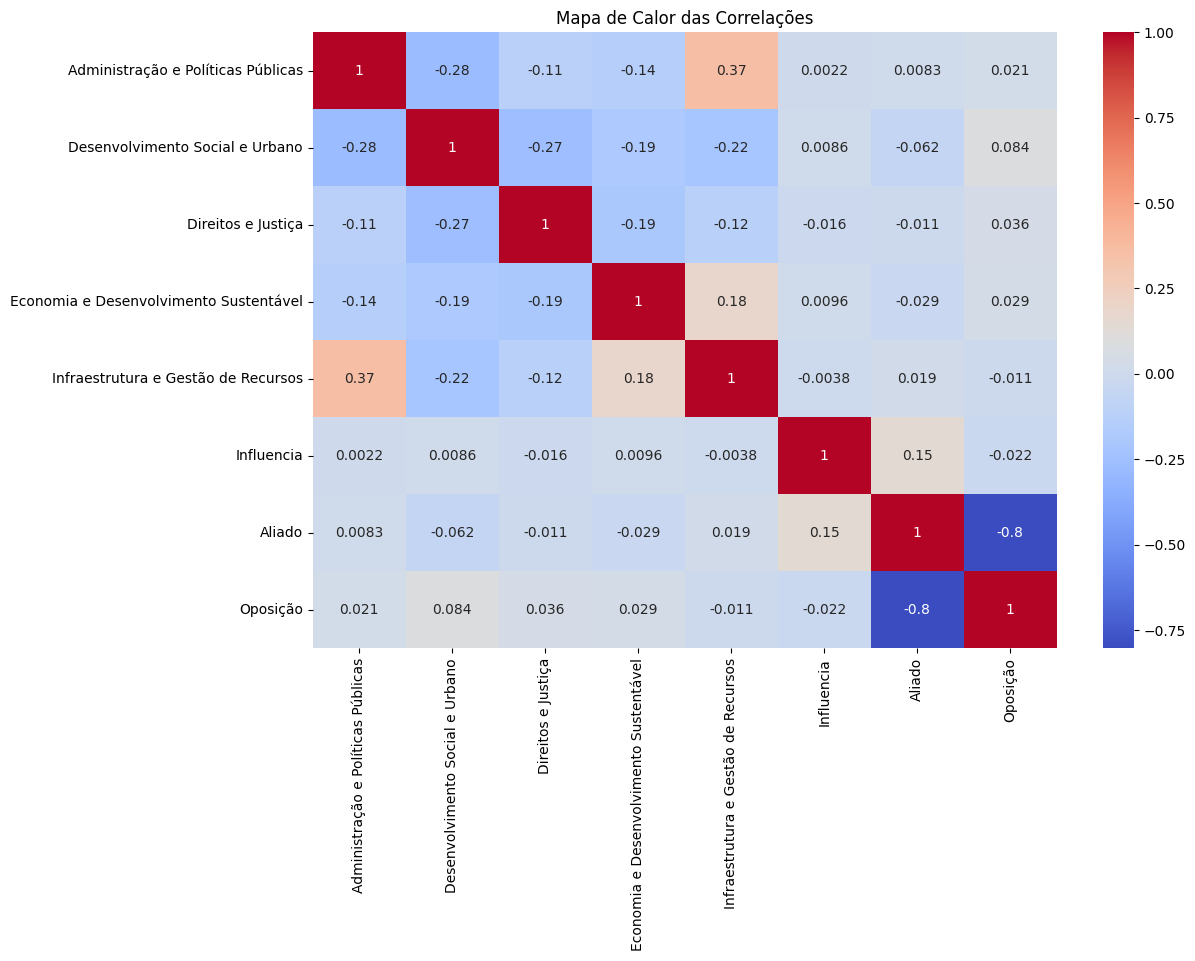

In [42]:
correlation_matrix = x.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Mapa de Calor das Correlações')
plt.show()

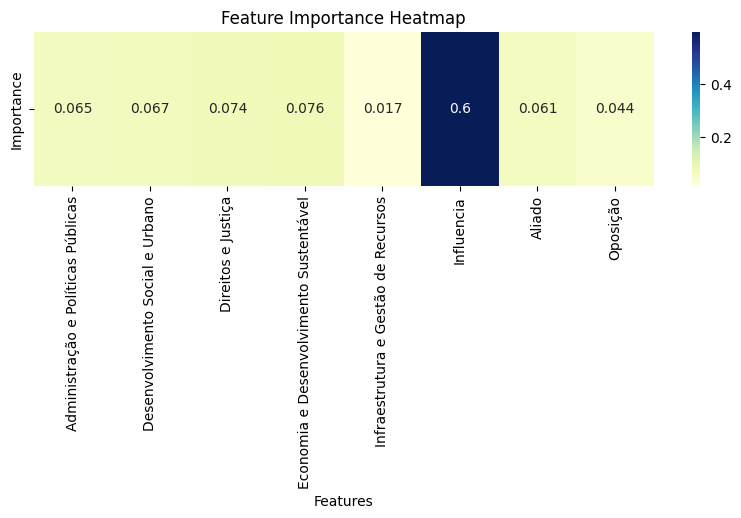

In [43]:
feature_names = x.columns
importances = clf.feature_importances_

importance_df = pd.DataFrame(importances.reshape(1, -1), columns=feature_names)

plt.figure(figsize=(10, 2))
sns.heatmap(importance_df, annot=True, cmap="YlGnBu", cbar=True, xticklabels=feature_names, yticklabels=["Importance"])
plt.title('Feature Importance Heatmap')
plt.xlabel('Features')
plt.show()

- Undersampling

In [44]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')
x_sample, y_sample = undersample.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.3, random_state=42)

#penalização customizada
class_w = {0: 1, 1: 10}

clf = DecisionTreeClassifier(class_weight='balanced')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy*100:.2f}%')

Acurácia do modelo: 56.18%


- Undersampling

In [45]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=0.5)
x_sample, y_sample = undersample.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.3, random_state=42)

#penalização customizada
class_w = {0: 1, 1: 10}

clf = DecisionTreeClassifier(class_weight='balanced')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy*100:.2f}%')

Acurácia do modelo: 58.38%


In [46]:
colunas = df.columns.tolist()
x = df[colunas[5:-4]]
y = df[colunas[-1]]

undersample = RandomUnderSampler(sampling_strategy=0.5)
x_sample, y_sample = undersample.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.2, random_state=42)

#penalização customizada
class_w = {0: 1, 1: 10}

#clf = DecisionTreeClassifier(class_weight='balanced')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy*100:.2f}%')

Acurácia do modelo: 57.92%


In [47]:
confusion_matrix(y_test, y_pred)

array([[151, 144],
       [ 50, 116]], dtype=int64)

In [57]:
x = df[[colunas[7], colunas[-4]]]
x

,Direitos e Justiça,Influencia
0,1,0.077973
1,0,0.024691
2,0,0.025341
3,0,0.148148
4,0,0.033138
...,...,...
7956,0,0.097466
7957,1,0.083821
7958,0,0.132554
7959,1,0.011696


In [59]:
colunas = df.columns.tolist()
x = df[colunas[-4:-1]]
y = df[colunas[-1]]

undersample = RandomUnderSampler(sampling_strategy=0.5)
x_sample, y_sample = undersample.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.2, random_state=42)

#penalização customizada
class_w = {0: 1, 1: 10}

#clf = DecisionTreeClassifier(class_weight='balanced')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy*100:.2f}%')

Acurácia do modelo: 56.18%
